# Welcome to covid19 Data Analysis Notebook

### Lets import the modules  

In [68]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
print('Modules are imported.')

Modules are imported.


### Task 2 : 

### Task 2.1 : Importing covid19 dataset 

##### Importing "covid19_confirmed_dataset.csv" from"./ dataset".folder

In [6]:
corona_dataset_csv = pd.read_csv("covid19_confirmed_dataset.csv")
corona_dataset_csv.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [8]:
corona_dataset_csv.shape

(266, 104)

### Task 2.2 : Delete the useless columns

In [12]:
df = corona_dataset_csv.drop(["Lat","Long"],axis=1,inplace=True)

In [11]:
corona_dataset_csv.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


### Task 2.3 : Aggregating the rows by the country 

In [14]:
df_aggregated = corona_dataset_csv.groupby("Country/Region").sum()

### this method will return us an aggregated value

In [15]:
df_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


#### We can look data shown above, How index with 0,1,2,3 is changed to country/Region name

In [17]:
df_aggregated.shape

(187, 100)

#### This means that we have 187 countries and 100 days data is present 

### Task2.4 : Visualizing data related to a country for example China , Italy and India 

#### Visualization always helps for better understanding of our data 

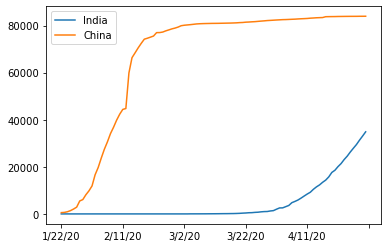

In [18]:
df_aggregated.loc['India'].plot()
df_aggregated.loc['China'].plot()
plt.legend()    #this will show which colour belongsto which country

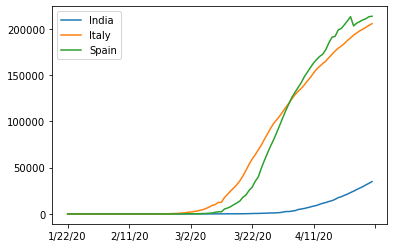

In [19]:
df_aggregated.loc['India'].plot()
df_aggregated.loc['Italy'].plot()
df_aggregated.loc['Spain'].plot()
plt.legend()

###  Task3 : Calculating a good measure

#### We need to find a good measure reperestend as a number , describing the spread of the virus in a country 

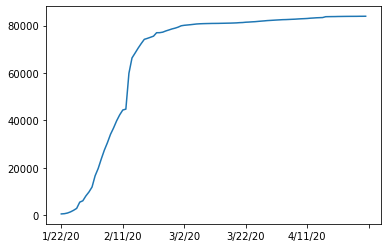

In [20]:
df_aggregated.loc ['China'].plot()

##### Let we want to see first three days cases in china.... 

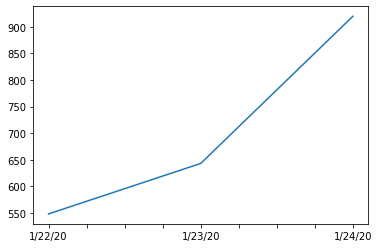

In [21]:
df_aggregated.loc['China'][:3].plot()

#### We that in first 24 hrs 'number of cases' jumped from 550 to 650 ie. only 100 new cases. But on next 24 hrs, it jumps from 650 to 900 ie. 250 new cases.
  

Now we want to find on which day maxm number of cases was recorded.For this we will find FIRST DERIVATIVE

#### Task3.1 : Caclulating the first derivative of the curve  

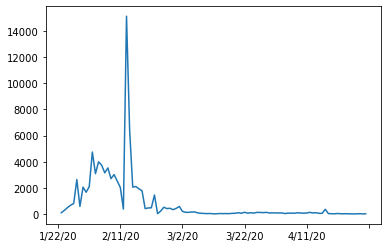

In [23]:
df_aggregated.loc['China'].diff().plot()

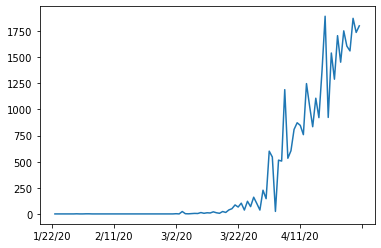

In [24]:
df_aggregated.loc['India'].diff().plot()

#### Task 3.2 : find maxmimum infection rate for China, Italy and India 

In [25]:
df_aggregated.loc['China'].diff().max()

15136.0

In [26]:
df_aggregated.loc['Italy'].diff().max()

6557.0

In [27]:
df_aggregated.loc['India'].diff().max()

1893.0

#### The maxm number of cases recorded in 24 hrs in ##### China was 15136, in Italy was 6557 and in India was 1892

### Task 3.3 : find Maximum infection rate for all of the countries.  

In [31]:
countries = list(df_aggregated.index)
max_infection_rates = []
for c in countries :
    max_infection_rates.append(df_aggregated.loc[c].diff().max())
    
# Adding new column "max_infection_rate to dataframe"    
df_aggregated['max_inf_rate'] = max_infection_rates

In [32]:
df_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_inf_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0


###  Task3.4 : Create a new dataframe with only needed column 

 Giving a new name to data frame "corona_data"

In [34]:
corona_max_df = pd.DataFrame(df_aggregated['max_inf_rate'])

In [35]:
corona_max_df.head()

,max_inf_rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


### Task4 : 

. Importing the WorldHappinessReport.csv dataset
.  selecting needed columns for our analysis 
.  join the datasets
. calculate the correlations as the result of our analysis 

###  Task 4.1 : importing the dataset

In [40]:
happiness_repo_csv = pd.read_csv("worldwide_happiness_report.csv")

In [41]:
happiness_repo_csv.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


### Task 4.2 : let's drop the useless columns 

In [46]:
useless_cols = ["Overall rank","Score","Generosity","Perceptions of corruption"]

In [47]:
happiness_repo_csv.drop(useless_cols, axis=1 , inplace=True)
happiness_repo_csv.head()


,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


### Task 4.3 : Changing the indices of the dataframe 

In [48]:
happiness_report_csv= happiness_repo_csv.groupby('Country or region').sum()

In [49]:
happiness_report_csv.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Afghanistan,0.350,0.517,0.361,0.000
Albania,0.947,0.848,0.874,0.383
Algeria,1.002,1.160,0.785,0.086
Argentina,1.092,1.432,0.881,0.471
Armenia,0.850,1.055,0.815,0.283


### Task 4.4 : now let's join two dataset we have prepared 

In [50]:
corona_max_df.head()

,max_inf_rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


In [51]:
corona_max_df.shape

(187, 1)

#### world happiness report Dataset :  

In [52]:
happiness_report_csv.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Afghanistan,0.350,0.517,0.361,0.000
Albania,0.947,0.848,0.874,0.383
Algeria,1.002,1.160,0.785,0.086
Argentina,1.092,1.432,0.881,0.471
Armenia,0.850,1.055,0.815,0.283


In [53]:
happiness_report_csv.shape

(156, 4)

In [ ]:
# We will do inner join as less rows in secand dataframe

In [54]:
data = corona_max_df.join(happiness_report_csv, how="inner")

In [55]:
data.head()

,max_inf_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


### Task 4.5 : Correlation matrix 

In [56]:
data.corr()

,max_inf_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_inf_rate,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


### Task 5 : Visualization of the results  

our Analysis is not finished usless we visualize the results in terms figures and graphs so that everyone can understand what you get out of our analysis 

In [57]:
data.head()

,max_inf_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


### Task 5.1 : Plotting GDP vs maximum Infection rate  

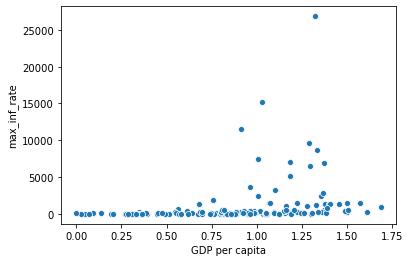

In [59]:
x =  data["GDP per capita"]
y =  data["max_inf_rate"]
sns.scatterplot(x,y)

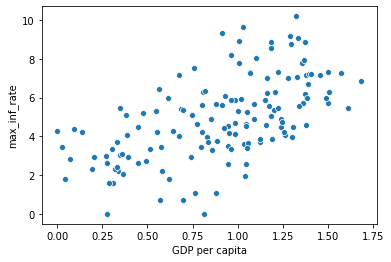

In [60]:
x = data["GDP per capita"]
y = data["max_inf_rate"]
sns.scatterplot(x,np.log(y))

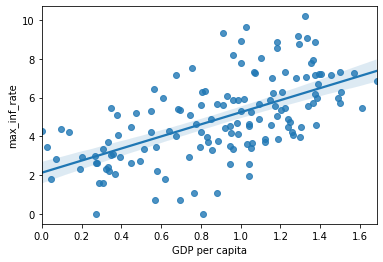

In [61]:
sns.regplot(x,np.log(y))

### Task 5.2 plotting social support vs maximum infection rate 

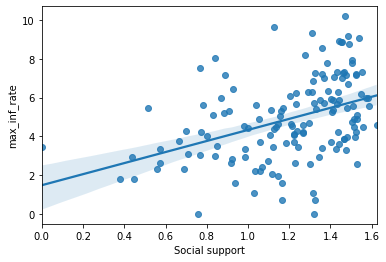

In [65]:
x = data["Social support"]
y = data["max_inf_rate"]
sns.regplot(x,np.log(y))

### Task 5.3 : Plotting Healthy life expectancy vs maximum infection rate 

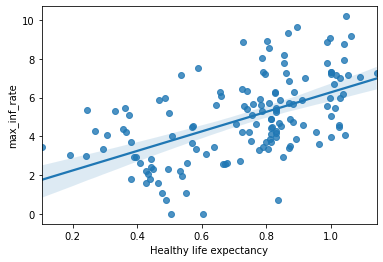

In [66]:
x = data["Healthy life expectancy"]
y = data["max_inf_rate"]
sns.regplot(x,np.log(y))

### Task 5.4 : Plotting freedom to make life choices vs maximum infection rate 

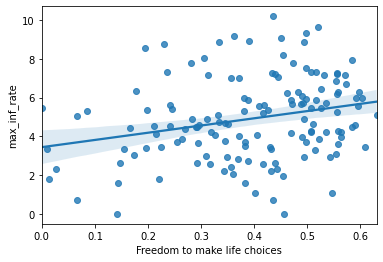

In [67]:
x = data["Freedom to make life choices"]
y = data["max_inf_rate"]
sns.regplot(x,np.log(y))